In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
#    LOAD LOG FILES
# ---------------------------

# Calibration log
calibration_file = "sensor0_calibration.csv"
calibration_data = pd.read_csv(calibration_file)

post_calibration_file = "post_calibration_validation.csv"
post_calibration_data = pd.read_csv(post_calibration_file)

# Main control log
control_file = "hybrid_bangbang_pid_log.csv"
control_data = pd.read_csv(control_file)


# ---------------------------
#    CALIBRATION PLOT
# ---------------------------

def plot_calibration(data):
    plt.figure(figsize=(10, 6))
    plt.plot(
        data["Duty Cycle (%)"],
        data["Sensor0 Voltage (V)"],
        marker="o",
        linestyle="-",
        label="Sensor0 Raw Voltage"
    )
    plt.title("Calibration Curve: Sensor0 vs Duty Cycle", fontsize=16)
    plt.xlabel("Duty Cycle (%)", fontsize=14)
    plt.ylabel("Sensor0 Voltage (V)", fontsize=14)
    plt.grid()
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
def plot_post_calibration(data):
    # Scatter Plot: Duty Cycle vs Sensor0 Voltage
    plt.figure(figsize=(12, 6))
    plt.scatter(
        data["Duty Cycle (%)"],
        data["Sensor0 Raw Voltage (V)"],
        label="Sensor0 Raw Voltage",
        alpha=0.7
    )
    plt.scatter(
        data["Duty Cycle (%)"],
        data["Sensor0 Corrected Voltage (V)"],
        label="Sensor0 Corrected Voltage",
        alpha=0.7
    )
    plt.title("Scatter Plot: Sensor0 vs Duty Cycle", fontsize=16)
    plt.xlabel("Duty Cycle (%)", fontsize=14)
    plt.ylabel("Sensor0 Voltage (V)", fontsize=14)
    plt.grid()
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    # Time-Series Plot: Sensor0 Voltage vs Time
    plt.figure(figsize=(12, 6))
    plt.plot(
        data["Timestep (s)"],
        data["Sensor0 Raw Voltage (V)"],
        label="Sensor0 Raw Voltage",
        linestyle="-"
    )
    plt.plot(
        data["Timestep (s)"],
        data["Sensor0 Corrected Voltage (V)"],
        label="Sensor0 Corrected Voltage",
        linestyle="-"
    )
    plt.title("Time-Series Plot: Sensor0 Voltage vs Time", fontsize=16)
    plt.xlabel("Time (s)", fontsize=14)
    plt.ylabel("Sensor0 Voltage (V)", fontsize=14)
    plt.grid()
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


# ---------------------------
#    CONTROL PLOTS
# ---------------------------

def plot_control(data):
    # Sensor voltages over time
    plt.figure(figsize=(12, 8))
    plt.plot(data["Time_s"], data["Sensor0_Raw_V"], linestyle="--", label="Sensor0 Raw Voltage")
    plt.plot(data["Time_s"], data["Sensor0_Corrected_V"], label="Sensor0 Corrected Voltage")
    plt.plot(data["Time_s"], data["Sensor1_V"], label="Sensor1 Voltage")
    plt.plot(data["Time_s"], data["Sensor2_V"], label="Sensor2 Voltage")
    #plt.plot(data["Time_s"], data["MeanFloor_V"], label="Mean Floor Voltage", linestyle="--")
    plt.title("Sensor Data Over Time", fontsize=16)
    plt.xlabel("Time (s)", fontsize=14)
    plt.ylabel("Voltage (V)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Duty cycle over time
    plt.figure(figsize=(10, 6))
    plt.plot(data["Time_s"], data["DutyCycle_%"], label="Duty Cycle", color="blue")
    plt.title("PWM Duty Cycle Over Time", fontsize=16)
    plt.xlabel("Time (s)", fontsize=14)
    plt.ylabel("Duty Cycle (%)", fontsize=14)
    plt.grid()
    plt.tight_layout()
    plt.show()


# ---------------------------
#    PLOT TERMS
# ---------------------------

def plot_pid_terms(data):
    # PID terms over time
    plt.figure(figsize=(12, 8))
    plt.plot(data["Time_s"], data["HYST_LOW"], label="Hysteresis Low", linestyle="--", color="green")
    plt.plot(data["Time_s"], data["HYST_HIGH"], label="Hysteresis High", linestyle="--", color="red")
    plt.plot(data["Time_s"], data["Setpoint"], label="Setpoint", linestyle="--", color="purple")
    plt.plot(data["Time_s"], data["Sensor0_Corrected_V"], label="Sensor0 Corrected Voltage")
    #plt.plot(data["Time_s"], data["DutyCycle_%"], label="Duty Cycle", color="blue")
    plt.title("Setpoint and Hysteresis Thresholds", fontsize=16)
    plt.xlabel("Time (s)", fontsize=14)
    plt.ylabel("Voltage (V)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()




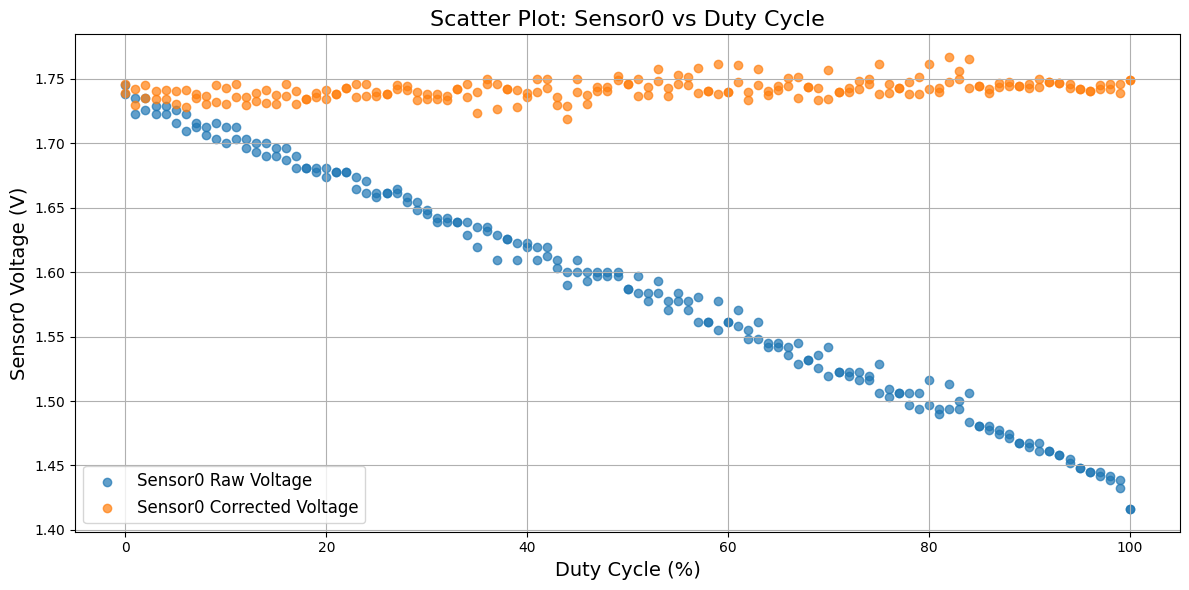

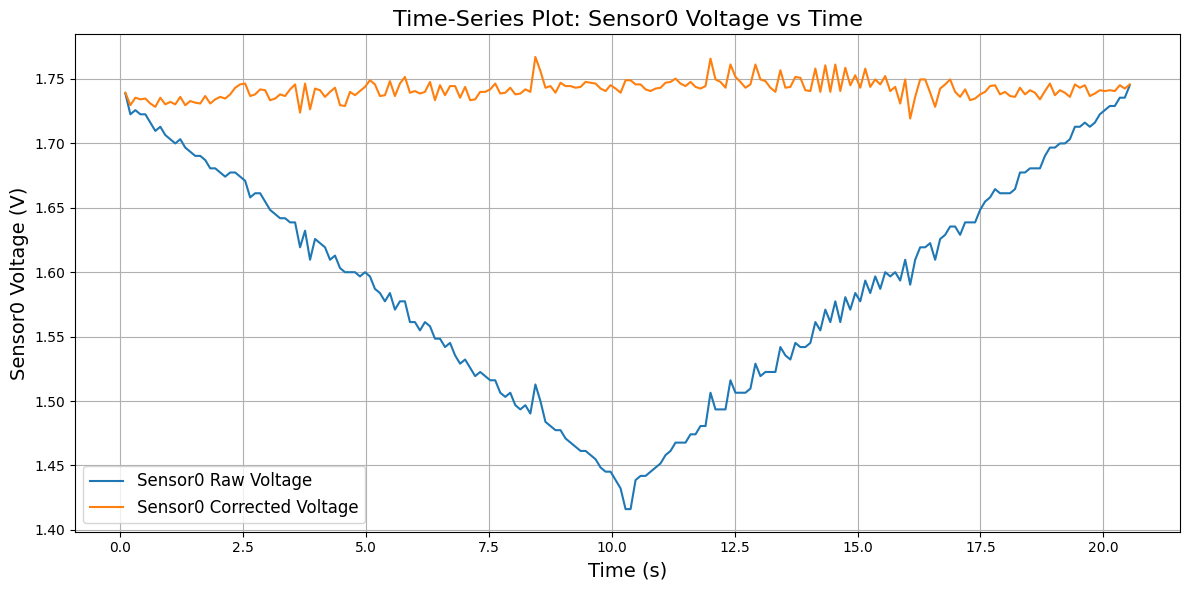

In [114]:
plot_post_calibration(post_calibration_data)

Plotting control data...


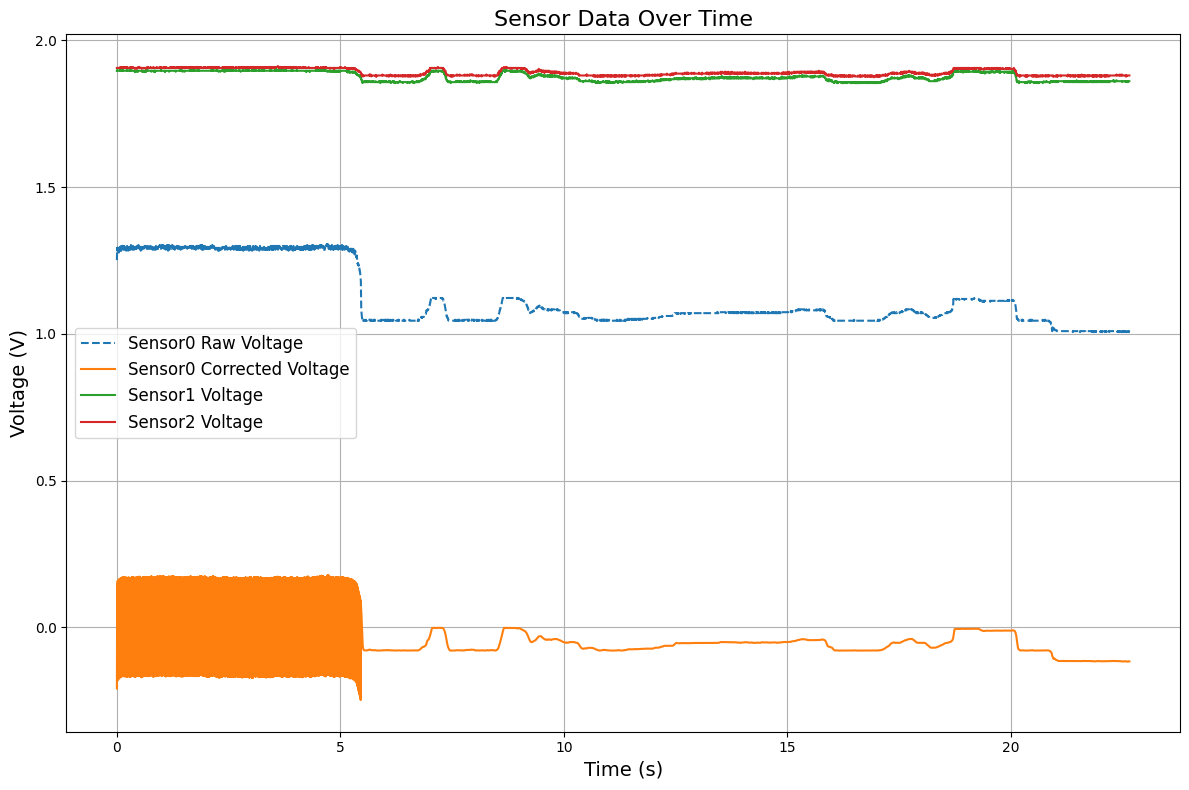

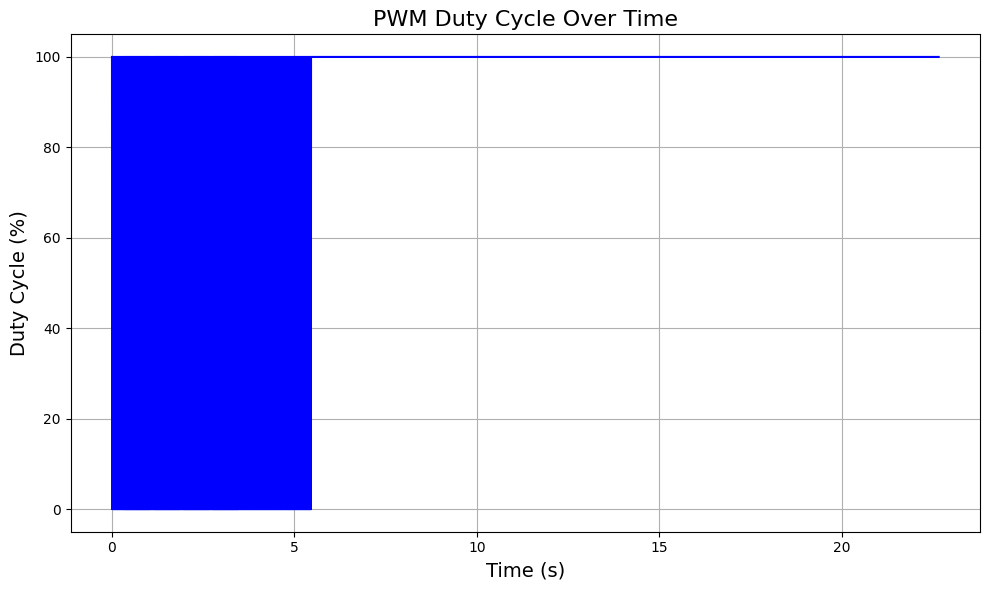

In [115]:
print("Plotting control data...")
plot_control(control_data)

Plotting PID terms...


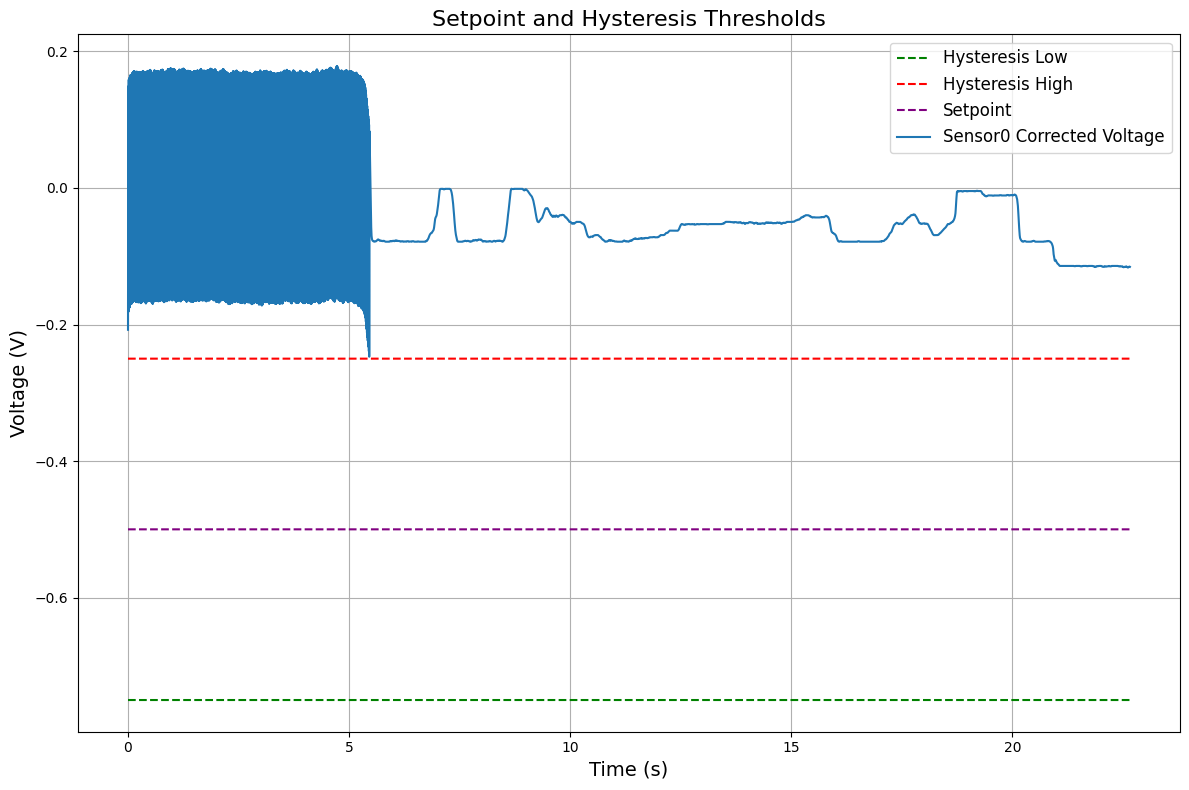

In [116]:
print("Plotting PID terms...")
plot_pid_terms(control_data)

In [117]:
control_data.Sensor0_Raw_V.value_counts()

Sensor0_Raw_V
1.0452    953
1.0709    516
1.2936    395
1.0742    379
1.2903    354
         ... 
1.2097      1
1.2129      1
1.2258      1
1.2226      1
1.2710      1
Name: count, Length: 68, dtype: int64